<a href="https://colab.research.google.com/github/TTD-JPO/TDD-project/blob/main/disaster_tweets_jedi_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta, time

In [108]:
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, plot_confusion_matrix

from sklearn.naive_bayes import CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#cv = CountVectorizer()
#bow_cv = cv.fit_transform(df["_lemmatized"])

In [94]:
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


def clean_text(text):
  # get rid of all unwanted punctuation and digits
  text = text.replace("´", "'")

  digi_punct = "[^a-zA-Z' ]"
  text = re.sub(digi_punct, " ", text)
  text = " ".join(text.split())
  text = text.lower()

  return text

def my_df_text_mining(df, col):
  lemmatizer = WordNetLemmatizer()
  my_stopwords = stopwords.words("english")
  
  df["_no_stopwords"] = df[col].apply(             lambda texxt: " ".join([word for word in clean_text(texxt).split() if word not in my_stopwords]))
  df["_lemmatized"]   = df["_no_stopwords"].apply( lambda texxt: " ".join([lemmatizer.lemmatize(word) for word in texxt.split()]) )

  return df.drop(["_no_stopwords"], axis=1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
disaster_tweets = pd.read_csv('/content/drive/My Drive/disaster_tweets.csv', encoding='latin-1')

In [67]:
print( "absolute number of disaster indicated messages:", disaster_tweets.target.sum() )
print( f"relative number of disaster indicated messages: {disaster_tweets.target.sum() / disaster_tweets.shape[0] :0.3f}" )

absolute number of disaster indicated messages: 3271
relative number of disaster indicated messages: 0.430


In [14]:
keys      = list(disaster_tweets.keyword.unique() )
locations = list(disaster_tweets.location.unique() )

In [102]:
display( f"relative number of keyword   messages: {disaster_tweets.keyword.nunique()  / disaster_tweets.shape[0] :0.3f}" )
display( f"relative number of location  messages: {disaster_tweets.location.nunique() / disaster_tweets.shape[0] :0.3f}" )

'relative number of keyword   messages: 0.029'

'relative number of location  messages: 0.439'

In [87]:
### we might do these steps later after having processed the text :)
#dt = disaster_tweets.copy()

In [95]:
dt = my_df_text_mining(disaster_tweets, 'text')

In [96]:
no_keyword_ = dt[  dt.keyword.isna()]
keyword_    = dt[ ~dt.keyword.isna()]

In [97]:
no_location_ = dt[  dt.location.isna()]
location_    = dt[ ~dt.location.isna()]

In [98]:
no_target_ = dt[ dt.target == 0]
target_    = dt[ dt.target == 1]

In [101]:
location_

,id,keyword,location,text,target,_lemmatized
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale market ablaze http co lhyxeohy c
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,always try bring heavy metal rt http co yao e ...
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking news nigeria flag set abl...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,cry set ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plus side look sky last night ablaze http co q...
...,...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0,bright side wrecked http co uea txrhys
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,widda he's gone relax thought wife wrecked cak...
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,three day work they've pretty much wrecked hah...
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,fx forex trading cramer iger's word wrecked di...


In [117]:
df    = location_
no_df = no_location_

In [118]:
tfidf_v = TfidfVectorizer(ngram_range=(1, 2))
tfidf_bow = tfidf_v.fit_transform(df["_lemmatized"])   # FIT and transform to learn
### ??? wo wird das denn weiterverwendet ???

In [119]:
tfidf_v.transform(no_df['_lemmatized'])  # only transformation!!!

<2533x55580 sparse matrix of type '<class 'numpy.float64'>'
	with 28359 stored elements in Compressed Sparse Row format>

In [120]:
X_train, X_test,\
y_train, y_test =\
 train_test_split(df["_lemmatized"],
                  df["target"],
                  test_size=0.2,
                  random_state=314159,
                  stratify=df["target"])

0.7851907730899969

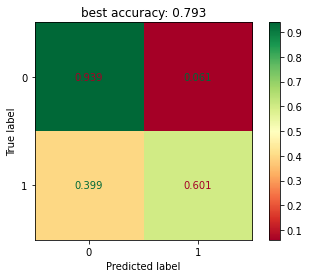

In [121]:
#### naive bayes 
pipeMNB = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), MultinomialNB())

display( cross_val_score(pipeMNB, X_train, y_train).mean() )

pipeMNB.fit(X_train, y_train)

plot_confusion_matrix(pipeMNB, X_test, y_test, values_format="0.3f", normalize='true', cmap="RdYlGn")
plt.title(f"best accuracy: { accuracy_score(y_test, pipeMNB.predict(X_test)):0.3f}")
plt.show()

**OLD**

In [ ]:
%time result_dot = (tfidf_all_tips_uID_max_ven_).dot(tfidf_other_vID_uID_max_ven_.T)  # -T due to dimensions
result_dot.shape

CPU times: user 7.19 ms, sys: 816 µs, total: 8.01 ms
Wall time: 7.81 ms


(1, 3088)

In [ ]:
# your code
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
%time cosim = cosine_similarity( tfidf_all_tips_uID_max_ven_ , tfidf_other_vID_uID_max_ven_  )  # ohne .T ?
cosim.shape

CPU times: user 7.46 ms, sys: 958 µs, total: 8.42 ms
Wall time: 13.3 ms


(1, 3088)